In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

<b>1. Generate Some Data.</b> 

```Simulate 100 data points in the space R2. You can generate two vectors of random numbers in an interval (for instance, let each of 𝑥1, 𝑥2 be in the interval (−10,10) and use that as your initial data.```

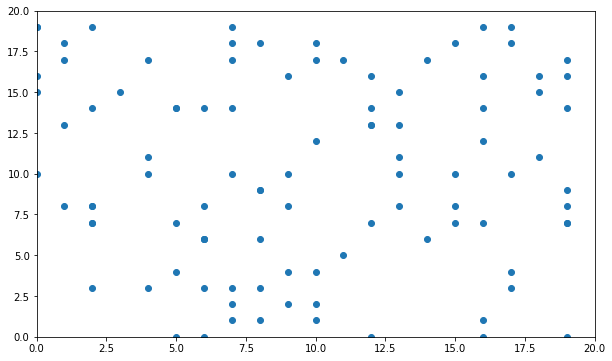

In [2]:
data = np.random.randint(0, 20, size=(100, 2))
plt.figure(figsize=(10,6))
plt.scatter(data[:,0],data[:,1])
plt.xlim([0,20])
plt.ylim([0,20])
plt.show()

<b>2. Choose a Target Function.</b> 

```Choose a line that you will use to separate the data into successes and failures. For instance, you might choose the line 1.5𝑥1 − 𝑥2 − 1 = 0. You are free to choose whatever line you like, but make sure some of your points will get classified as successes and some as failures. Your chosen line should split your data set into two parts.
Using your chosen line, classify each point as a success or as a failure. You can do this by calculating, for instance, 1.5𝑥1 − 𝑥2 − 1 for each point and assigning +1 when this formula gives an answer greater than or equal to zero and −1 when the formula gives an answer less than zero.```

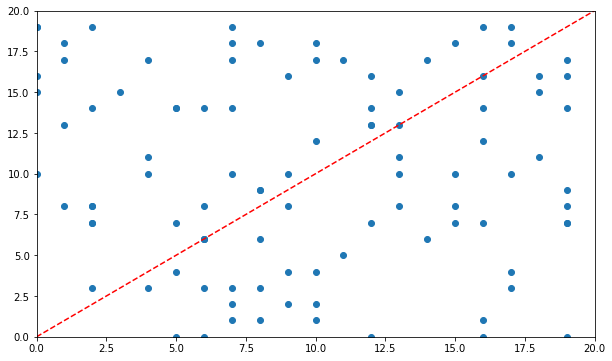

In [3]:
'''For this section I will use a generic x=y line in Red as the Target funnction. Above the line will be 
considered a success, below the line would be considered a failure. Firstly, let us visualize the data 
and the Target Function'''

x = np.linspace(0, 20, 2000)
y = x
plt.figure(figsize=(10,6))
plt.scatter(data[:,0],data[:,1])
plt.plot(x, y, linestyle='--', color='r')
plt.xlim([0,20])
plt.ylim([0,20])
plt.show()

In [4]:
classification = np.ones(data.shape[0])

for i in range(data.shape[0]):      
     if data[i,0] - data[i,1] >= 0:
        classification[i]=-1
print(classification)

[ 1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1.  1.  1.  1.  1. -1.
  1.  1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1. -1.  1. -1. -1.
  1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1.  1. -1.
  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1.
  1.  1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1.
 -1. -1.  1. -1. -1.  1. -1.  1.  1.  1.]


In [5]:
labelled_data = pd.DataFrame({'x': data[:,0],'y':data[:,1],'label':classification})
labelled_data.head()

,x,y,label
0,9,10,1.0
1,6,6,-1.0
2,2,8,1.0
3,6,6,-1.0
4,17,4,-1.0


<b>3. Plot Your Data. </b> 

```Create a scatterplot like the first plot above that labels the points according to their classification. Can you visualize the line you chose? If not, go back and make sure you are assigning labels correctly. Create a second plot that also includes the target line. Does it correctly separate the data?```

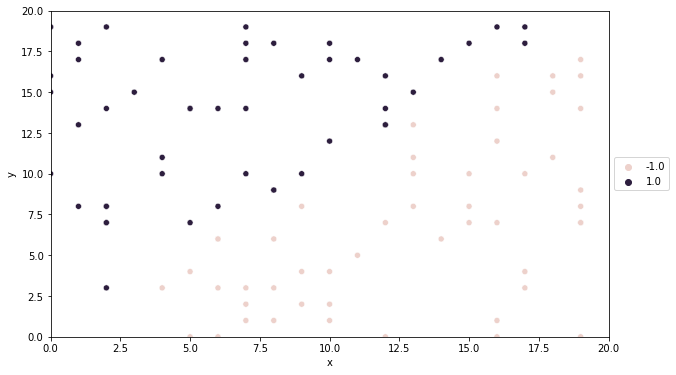

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=labelled_data, x="x", y="y", hue="label")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim([0,20])
plt.ylim([0,20])
plt.show()

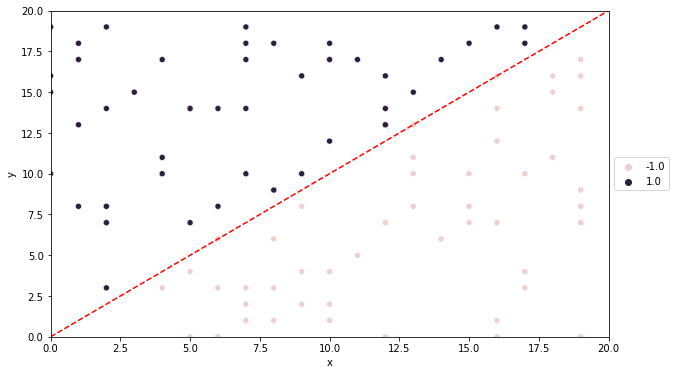

In [7]:
h = np.linspace(0, 20, 2000)
i = h 

plt.figure(figsize=(10,6))
sns.scatterplot(data=labelled_data, x="x", y="y", hue="label")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim([0,20])
plt.ylim([0,20])
plt.plot(h, i, linestyle='--', color='r')
plt.show()

<b> 4. Create the Training Data.</b>

```Package your data together into a data frame. The data frame should have three columns (one each for 𝑥1, 𝑥2, 𝑎𝑛𝑑 𝑦), where 𝑥1 and 𝑥2 are real numbers and 𝑦 is either −1 or 1.```

In [8]:
labelled_data1 = pd.DataFrame({'x1': data[:,0],'x2':data[:,1],'y':classification})
pd.to_numeric(labelled_data1['y'])
labelled_data1

,x1,x2,y
0,9,10,1.0
1,6,6,-1.0
2,2,8,1.0
3,6,6,-1.0
4,17,4,-1.0
...,...,...,...
95,0,19,1.0
96,16,16,-1.0
97,5,7,1.0
98,7,18,1.0


In [9]:
#Define X and y for analysis
X = np.asarray(data)
y = np.asarray(classification) 

<b>5. Initialize the Perceptron.</b>
    
```We are going to start by proposing a simple line that could be the target function. (It almost certainly won’t be correct!) Remember, we won’t usually know the target function, but in this case you do. Our perceptron is going to take the following form:
𝑓(𝑥1, 𝑥2) = 𝑠𝑖𝑔𝑛(𝑤0 + 𝑤1 ∙ 𝑥1 + 𝑤2 ∙ 𝑥2)

Notice that this is a line in two dimensions. There are three coefficients, called weights, in our model. We put a weight on each of the two input variables (𝑤1 on 𝑥1, 𝑤2 on 𝑥2) and we also create what we will later refer to as the bias (𝑤0). Our perceptron algorithm’s job is to learn weights that fit the data well.

We will implement our sign function with a small modification. If 𝑤0 + 𝑤1 ∙ 𝑥1 + 𝑤2 ∙ 𝑥2 = 0, assign a positive sign. If you generated random continuous inputs, this is unlikely to happen, but let’s make the choice now.

Create a vector of weights 𝑤(0) = (𝑤0, 𝑤1, 𝑤2) and set all three weights to zero. We will talk more about how to initialize weights later in the course. For now, just start with all zeros. Note that we write 𝑤(0) to indicate this is our first attempt at a vector of weights. We will then choose 𝑤(1), 𝑤(2), and so on until we find our solution.```

In [10]:
'''Initialize Perceptron with Classes -1 and 1'''

def sign(a):
    if a >= 0:
        return 1
    else:
        return -1
    
'''Perceptron function that applies initialization function defined above'''

def perceptron_predict(X, w):
    y_predicted = np.zeros(X.shape[0])
    
    for i in range(X.shape[0]):
        y_predicted[i] = sign((w[0]*X[i,0]) + (w[1]*X[i,1]) + w[2])
    
    return y_predicted

'''Vector of weights'''

w = (2 * np.random.random_sample(3)) - 1
w

array([-0.59742348, -0.06661399, -0.71281538])

<b>6. Classify the Data.</b> 

```Using the function in part 5 above, classify each data point using these initial weights. That is, calculate 𝑓(𝑥1, 𝑥2) for each point and assign the correct output. These are our predicted classifications.```

In [11]:
y_predicted = perceptron_predict(X, w)

y_predicted 

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

<b> 7. Generate the Confusion Matrix. </b>

```Create a simple table of your predicted results versus actual results.```

In [12]:
def confusion_matrix(y_predicted, y_actual, prints = False):
    true_positive = []
    true_negative = []
    false_positive = []
    false_negative = []
    
    for i in range(len(y_actual)):
        if (y_actual[i] == 1) and (y_predicted[i] == 1):
            true_positive.append(i)
        elif (y_actual[i] == -1) and (y_predicted[i] == -1):
            true_negative.append(i)
        elif (y_actual[i] == -1) and (y_predicted[i] == 1):
            false_positive.append(i)
        elif (y_actual[i] == 1) and (y_predicted[i] == -1):
            false_negative.append(i)
    
    if prints:
        print("True Positive Count:", len(true_positive))
        print("False Positive Count:", len(false_positive))
        print("False Negative Count:", len(false_negative))
        print("True Negative Count:", len(true_negative))
        print("Accuracy:", 100*(len(true_positive) + len(true_negative))/len(y_actual), "%")
    
    return np.array(true_positive), np.array(false_positive), np.array(false_negative), np.array(true_negative)

In [13]:
'''Random Cell to test the Confusion Matrix function output'''

a, b, c, d = confusion_matrix([1,1,1,-1], [1,-1,1,-1], True)

True Positive Count: 2
False Positive Count: 1
False Negative Count: 0
True Negative Count: 1
Accuracy: 75.0 %


<b> 8. Evaluate the Result. </b>

```Are all the observations correctly classified? Probably not, and that’s okay. If all the observations are classified correctly, we are done. We have learned a set of weights that fits the data well. We would output the solution and use it to classify future observations where the classification is not known. If there are mistakes in the classifications, though, we need to modify our weights and try again. In that case, proceed to the next step.```

In [14]:
true_positive, false_positive, false_negative, true_negative = confusion_matrix(y_predicted, y, True)

True Positive Count: 0
False Positive Count: 0
False Negative Count: 49
True Negative Count: 51
Accuracy: 51.0 %


<b>9. Update the Weights. </b>

```We will use a simple rule to update the weights. Choose one observation at random from the observations that were misclassified. This observation has individual input values of 𝑥1𝑖 and 𝑥2𝑖 and a correct output value of 𝑦𝑖 . Note that 𝑦𝑖 is the true classification, not our predicted classification.
We update the new weights according to the following rules:
𝑤0(1) = 𝑤0(0) + 1 ∙ 𝑦𝑖 𝑤1(1) = 𝑤1(0) + 𝑥1 ∙ 𝑦𝑖 𝑤2(1) = 𝑤2(0) + 𝑥2 ∙ 𝑦𝑖
In matrix terms, we would write 𝑤(1) = 𝑤(0) + 𝑦𝑖𝑥𝑖, or more generally we can write
𝑤(𝑡 + 1) = 𝑤(𝑡) + 𝑦𝑖𝑥𝑖. Each time we update, we will choose a misclassified point at random, so the vector 𝑥𝑖 = (1, 𝑥1, 𝑥2) for that point. (Note that we have a 1, much like in linear regression, for the weight on the intercept term.)```

In [15]:
'''This function updated the weights with the required update formula'''

def perceptron_update(X, y, false_indices, w_old):
    i = int(np.random.choice(false_indices))
    
    w0 = w_old[0] + (y[i]*X[i,0])
    w1 = w_old[1] + (y[i]*X[i,1])
    w2 = w_old[2] + y[i]
    
    return np.array([w0, w1, w2])

In [16]:
'''This function trains the perceptron with our updated weight formula'''

def perceptron_train(X, y, w_initial, max_iterations = 10000):
    iterations = 0
    w = w_initial
    
    while iterations < max_iterations:
        y_predicted = perceptron_predict(X, w)
        
        true_pos, false_pos, false_neg, true_neg = confusion_matrix(y_predicted, y)
        
        accuracy = (len(true_pos) + len(true_neg))/len(y)
        if accuracy == 1:
            break
        
        #What are the false indicies?
        false_indices = np.concatenate((false_pos, false_neg))
        
        #Apply the function defined above to update weights
        w = perceptron_update(X, y, false_indices, w)
        
        iterations += 1
    
    print("Iterations Used:", iterations)
    print("\nFinal Training Accuracy:", 100*accuracy, "%")
    print("\nFinal Weight Vector:", w)
    return w

<b> 10. Classify the Data. </b>

```Use the new weights that have been generated to classify the data according to our perceptron function.```

In [17]:
w = perceptron_train(X, y, w)

Iterations Used: 19

Final Training Accuracy: 100.0 %

Final Weight Vector: [-38.59742348  37.93338601  -1.71281538]


<b> 11. Generate the Confusion Matrix. </b>

```As before, create your confusion matrix and calculate your accuracy. If you have achieved 100% accuracy, you are done. Otherwise, return to step 9 above and update your weights. Note that you will repeat steps 9-11 until you have either reached 100% accuracy or given up. You should be able to create a loop through steps 9-11 that stops when no observations are misclassified.
(In order to avoid an infinite loop error, I recommend also putting a hard stop at the 10,000th update. If this happens to you, you have probably not generated your initial data correctly.)```


In [18]:
'''Our model has a 100% accuracy, no need to have a Confusion Matrix'''

'Our model has a 100% accuracy, no need to have a Confusion Matrix'

<b>12. Deploy the Model. </b>

```Output your approximated target function. This is the function you have settled on to predict future classifications. As a test, generate a few (let’s say 30) new observations and their true classifications using the line you chose in step 2. Apply your approximated target function and predict the classifications for these new observations. How do you do? (You may not get 100% accuracy, but you should do reasonably well.)```

In [19]:
X_test = np.random.randint(0, 20, size=(200, 2))
X_test[0:4]

array([[ 1, 12],
       [ 3, 15],
       [10, 14],
       [17, 15]])

In [20]:
y_test = np.ones(X_test.shape[0])

for i in range(X_test.shape[0]):
    if X_test[i,0] - X_test[i, 1] >= 0:
        y_test[i] = -1
y_test

array([ 1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1., -1.,
        1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
        1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,
       -1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,
       -1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1.,
       -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,
       -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1

In [21]:
X_test_df = pd.DataFrame({'x': X_test[:,0],'y':X_test[:,1],'label':y_test})
labelled_data.head()

,x,y,label
0,9,10,1.0
1,6,6,-1.0
2,2,8,1.0
3,6,6,-1.0
4,17,4,-1.0


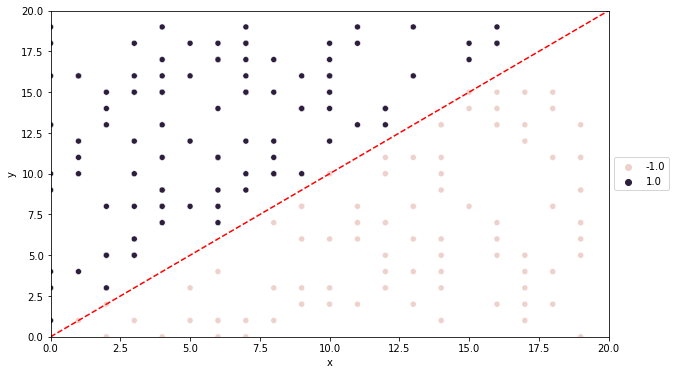

In [22]:
h = np.linspace(0, 20, 2000)
i = h 

plt.figure(figsize=(10,6))
sns.scatterplot(data=X_test_df, x="x", y="y", hue="label")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim([0,20])
plt.ylim([0,20])
plt.plot(h, i, linestyle='--', color='r')
plt.show()

In [23]:
y_predicted = perceptron_predict(X_test, w)
tp, fp, fn, tn = confusion_matrix(y_predicted, y_test, True)
print('\nFinal Weights are {}'.format(w))
print('\nFinal function: y = {}x0 + {}x1 + {}x2'.format(w0,w1,w2))

True Positive Count: 104
False Positive Count: 0
False Negative Count: 0
True Negative Count: 96
Accuracy: 100.0 %

Final Weights are [-38.59742348  37.93338601  -1.71281538]
